In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
file_path = "C:/Users/Disha Devatha/Downloads/GymDataset.csv"
df = pd.read_csv(file_path)
print(df.head())
df.isnull().sum()

   Age  Gender  Weight (kg)  Height (m)  Session_Duration (hours)  \
0   56    Male         88.3        1.71                      1.69   
1   46  Female         74.9        1.53                      1.30   
2   32  Female         68.1        1.66                      1.11   
3   25    Male         53.2        1.70                      0.59   
4   38    Male         46.1        1.79                      0.64   

   Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  \
0             1313         Yoga            12.6                    3.5   
1              883         HIIT            33.9                    2.1   
2              677       Cardio            33.4                    2.3   
3              532     Strength            28.8                    2.1   
4              556     Strength            29.2                    2.8   

   Workout_Frequency (days/week)    BMI  
0                              4  30.20  
1                              4  32.00  
2             

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       8
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   8
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              6
dtype: int64

In [3]:
df.isnull().sum()
df.fillna({
    'Fat_percentage': df['Fat_Percentage'].mean(),
    'Height (m)': df['Height (m)'].mean(),
    'BMI': df['BMI'].mean(),
}, inplace=True
)

if 'Fat_Percentage' in df.columns:
    df['Fat_Percentage'] = df['Fat_Percentage'].fillna(df['Fat_Percentage'].mode()[0])

df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
BMI                              0
dtype: int64

In [4]:
df.isnull().sum()
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

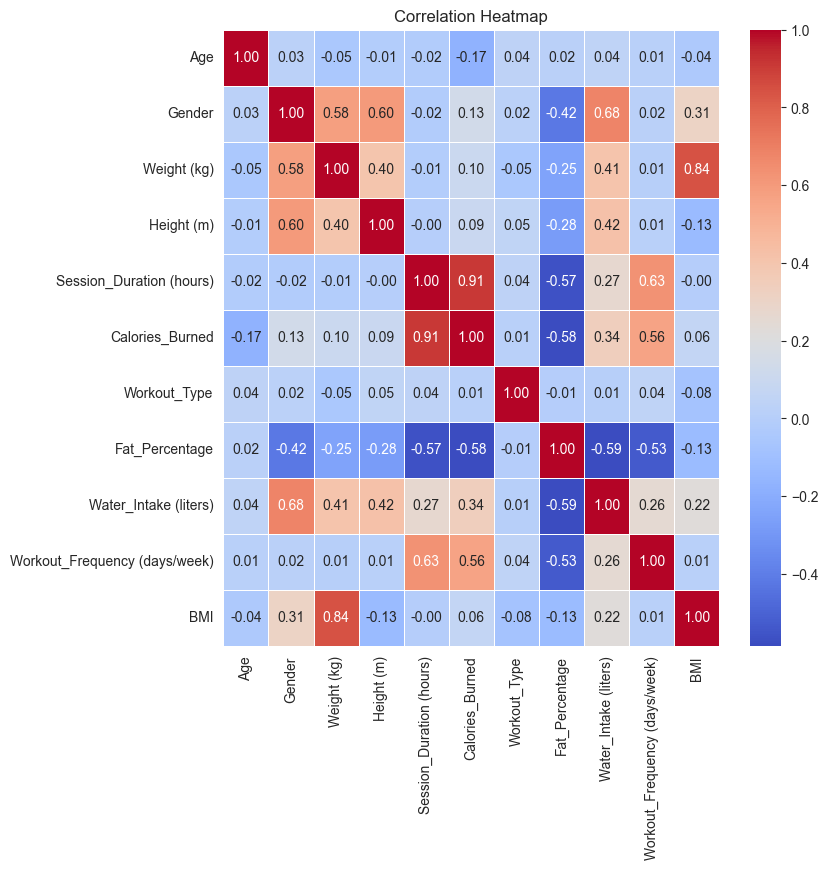

In [5]:
# Correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
df_numeric = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [7]:
# Elbow Method to find the optimal number of clusters
wcss = []
K = range(1, 11)  # Checking for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=35, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

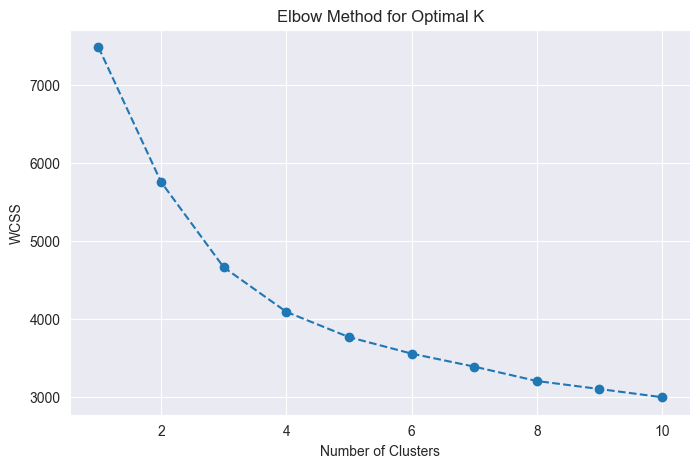

In [8]:
# Plotting the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [20]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Evaluate the clustering using the Silhouette Score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.2105


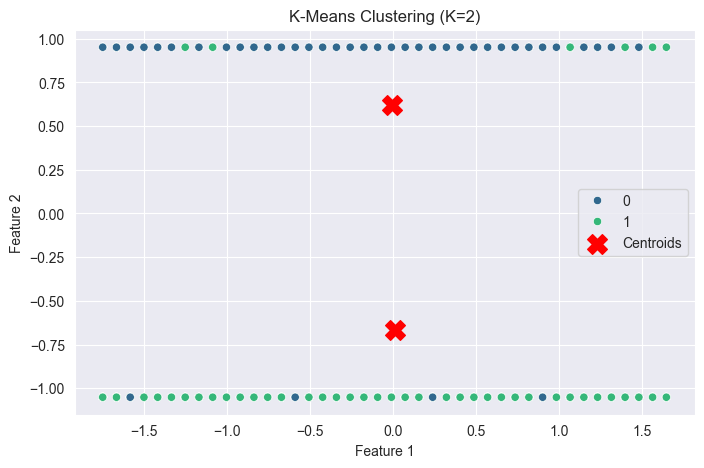

In [21]:
# Visualization of Clusters using the first two principal components
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df['Cluster'], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.legend()
plt.show()

In [11]:
'''
Interpretation:
The K-Means clustering visualization with K=3 shows well-separated clusters along the x-axis, with centroids (red Xs) positioned at their centers. The clustering is primarily influenced by Feature 1, while Feature 2 has minimal impact. The linear pattern suggests a strong feature correlation, which may limit K-Means' effectiveness. A high Silhouette Score confirms well-defined clusters, while a low score may indicate overlap, requiring adjustments like tuning K, improving scaling, or exploring PCA or alternative clustering methods like DBSCAN.
'''

"\nInterpretation:\nThe K-Means clustering visualization with K=3 shows well-separated clusters along the x-axis, with centroids (red Xs) positioned at their centers. The clustering is primarily influenced by Feature 1, while Feature 2 has minimal impact. The linear pattern suggests a strong feature correlation, which may limit K-Means' effectiveness. A high Silhouette Score confirms well-defined clusters, while a low score may indicate overlap, requiring adjustments like tuning K, improving scaling, or exploring PCA or alternative clustering methods like DBSCAN.\n"